In [221]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [222]:
df = pd.read_csv(r'C:\Users\jerlu\Downloads\archive (3)\results_with_crew.csv')
df

,tconst,primaryTitle,startYear,rank,averageRating,numVotes,runtimeMinutes,directors,writers,genres,IMDbLink,Title_IMDb_Link
0,tt0111161,The Shawshank Redemption,1994,1,9.3,3036981,142,Frank Darabont,"Stephen King, Frank Darabont",Drama,"<a href=""https://www.imdb.com/title/tt0111161""...","<a href=""https://www.imdb.com/title/tt0111161""..."
1,tt0068646,The Godfather,1972,2,9.2,2119993,175,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Crime, Drama","<a href=""https://www.imdb.com/title/tt0068646""...","<a href=""https://www.imdb.com/title/tt0068646""..."
2,tt0468569,The Dark Knight,2008,3,9.0,3013637,152,Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...","Action, Crime, Drama","<a href=""https://www.imdb.com/title/tt0468569""...","<a href=""https://www.imdb.com/title/tt0468569""..."
3,tt0167260,The Lord of the Rings: The Return of the King,2003,4,9.0,2073636,201,Peter Jackson,"J.R.R. Tolkien, Fran Walsh, Philippa Boyens, P...","Adventure, Drama, Fantasy","<a href=""https://www.imdb.com/title/tt0167260""...","<a href=""https://www.imdb.com/title/tt0167260""..."
4,tt0108052,Schindler's List,1993,5,9.0,1519241,195,Steven Spielberg,"Thomas Keneally, Steven Zaillian","Biography, Drama, History","<a href=""https://www.imdb.com/title/tt0108052""...","<a href=""https://www.imdb.com/title/tt0108052""..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,tt0116287,Fear,1996,4996,6.2,58544,97,James Foley,Christopher Crowe,"Drama, Thriller","<a href=""https://www.imdb.com/title/tt0116287""...","<a href=""https://www.imdb.com/title/tt0116287""..."
4996,tt0109068,Airheads,1994,4997,6.2,58051,92,Michael Lehmann,Rich Wilkes,"Comedy, Crime, Music","<a href=""https://www.imdb.com/title/tt0109068""...","<a href=""https://www.imdb.com/title/tt0109068""..."
4997,tt0109190,Baby's Day Out,1994,4998,6.2,58043,99,Patrick Read Johnson,John Hughes,"Adventure, Comedy, Crime","<a href=""https://www.imdb.com/title/tt0109190""...","<a href=""https://www.imdb.com/title/tt0109190""..."
4998,tt0947802,Lakeview Terrace,2008,4999,6.2,57726,110,Neil LaBute,"David Loughery, Howard Korder","Crime, Drama, Thriller","<a href=""https://www.imdb.com/title/tt0947802""...","<a href=""https://www.imdb.com/title/tt0947802""..."


In [223]:
df.describe()

,startYear,rank,averageRating,numVotes,runtimeMinutes
count,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,2002.021400,2500.500000,7.138500,1.634004e+05,114.572800
std,18.266386,1443.520003,0.596214,2.409974e+05,23.225921
min,1915.000000,1.000000,5.900000,2.501900e+04,25.000000
25%,1994.000000,1250.750000,6.700000,4.010000e+04,99.000000
50%,2007.000000,2500.500000,7.100000,7.460850e+04,111.000000
75%,2015.000000,3750.250000,7.600000,1.786105e+05,126.000000
max,2025.000000,5000.000000,9.300000,3.036981e+06,374.000000


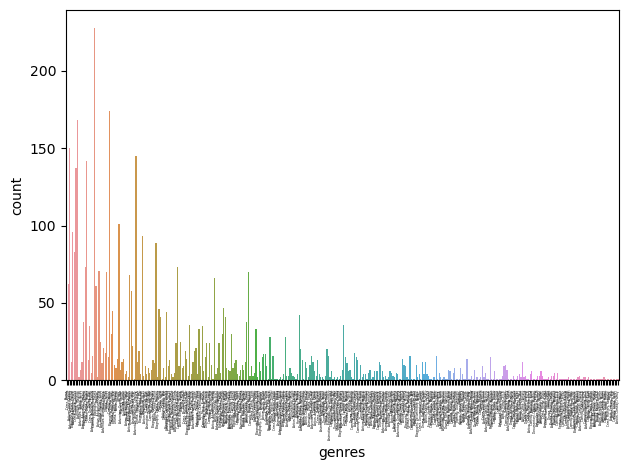

In [224]:
sns.countplot(x='genres', data=df)
plt.xticks(rotation=90,fontsize=2)
plt.tight_layout()
plt.show()

In [225]:
df.dtypes

tconst              object
primaryTitle        object
startYear            int64
rank                 int64
averageRating      float64
numVotes             int64
runtimeMinutes       int64
directors           object
writers             object
genres              object
IMDbLink            object
Title_IMDb_Link     object
dtype: object

In [226]:
from sklearn.cluster import KMeans

In [227]:
X = df[['runtimeMinutes', 'averageRating']]
X.head()

,runtimeMinutes,averageRating
0,142,9.3
1,175,9.2
2,152,9.0
3,201,9.0
4,195,9.0


Text(0, 0.5, 'Variance')

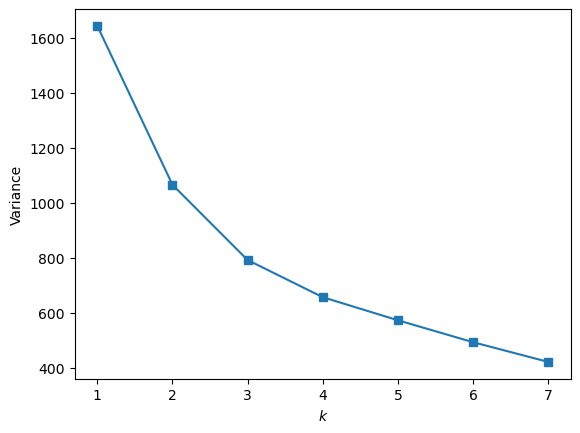

In [228]:
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init = 'auto').fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('Variance')

In [229]:
kmeans = KMeans(n_clusters = 2, random_state = 1,n_init= 10).fit(X)

In [230]:
y = kmeans.fit_predict(X)

In [231]:
df['cluster'] = y

<Axes: xlabel='runtimeMinutes', ylabel='averageRating'>

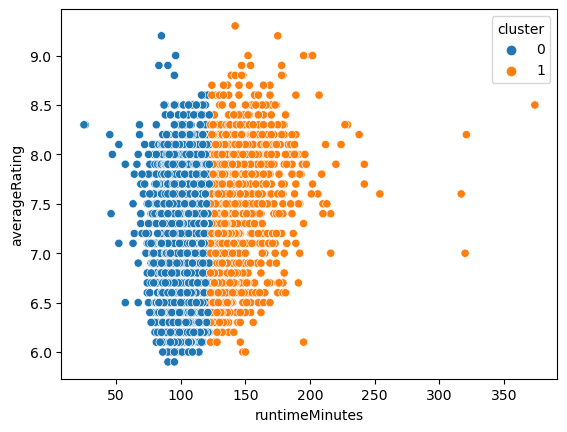

In [232]:
sns.scatterplot(x='runtimeMinutes', y='averageRating', hue='cluster', data=df)

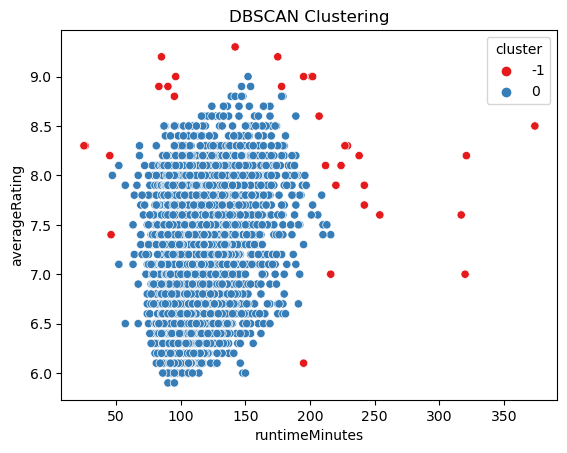

In [233]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

X = df[['runtimeMinutes', 'averageRating']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)  # You may need to tune these parameters
labels = dbscan.fit_predict(X_scaled)

df['cluster'] = labels

sns.scatterplot(x='runtimeMinutes', y='averageRating', hue='cluster', data=df, palette='Set1')
plt.title('DBSCAN Clustering')
plt.show()


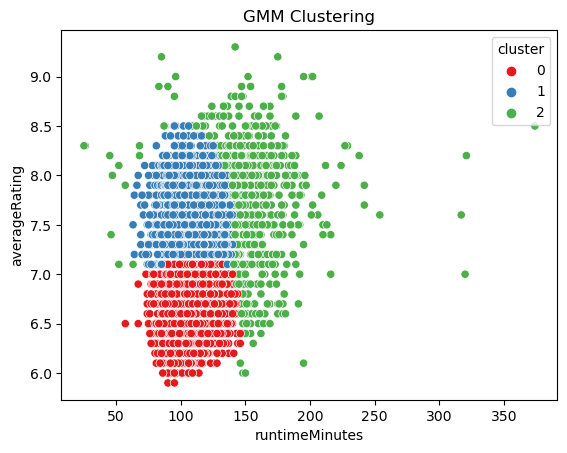

In [243]:
from sklearn.mixture import GaussianMixture

X = df[['runtimeMinutes', 'averageRating']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
gmm = GaussianMixture(n_components=3, random_state=1)
gmm.fit(X_scaled)

labels = gmm.predict(X_scaled)

df['cluster'] = labels
sns.scatterplot(x='runtimeMinutes', y='averageRating', hue='cluster', data=df, palette='Set1')
plt.title('GMM Clustering')
plt.show()


In [235]:
df.dtypes

tconst              object
primaryTitle        object
startYear            int64
rank                 int64
averageRating      float64
numVotes             int64
runtimeMinutes       int64
directors           object
writers             object
genres              object
IMDbLink            object
Title_IMDb_Link     object
cluster              int64
dtype: object

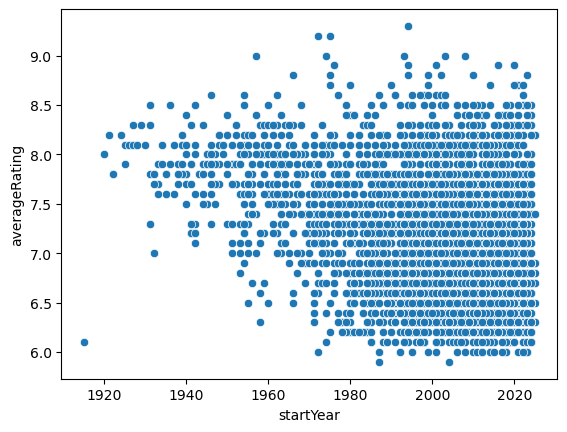

In [236]:
sns.scatterplot(x='startYear', y='averageRating', data=df)
plt.show()


<Axes: xlabel='runtimeMinutes', ylabel='averageRating'>

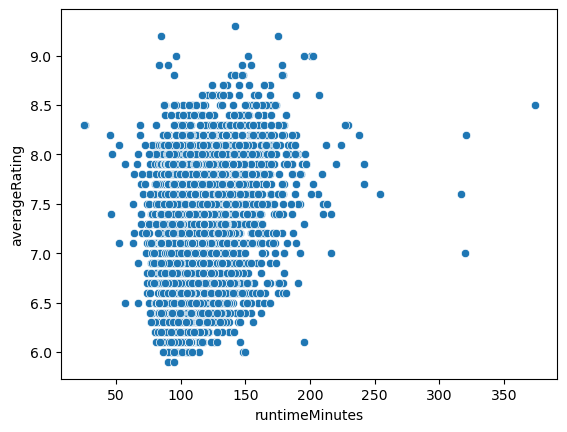

In [237]:
sns.scatterplot(x='runtimeMinutes', y='averageRating', data=df)

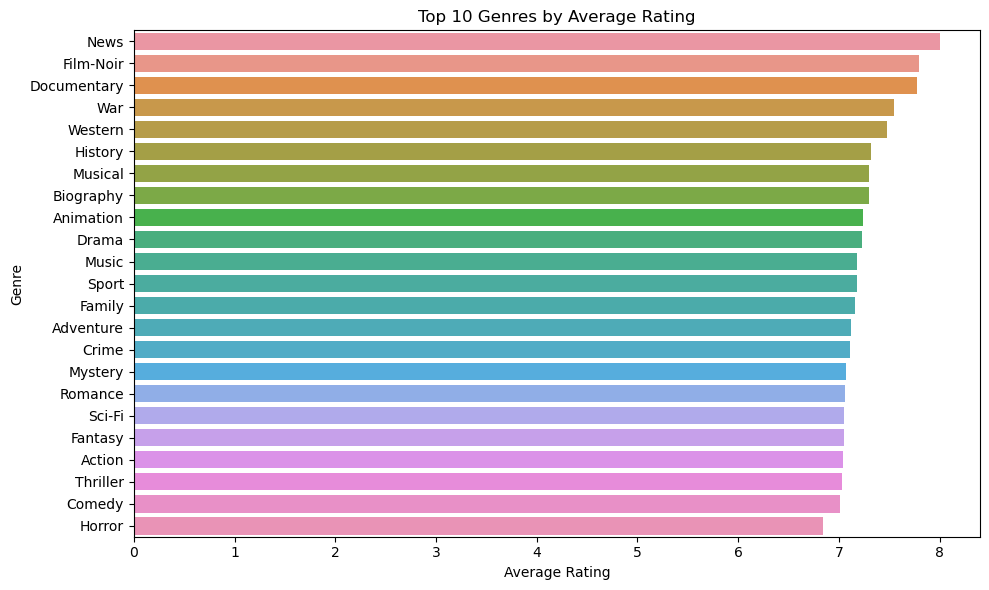

In [238]:
df_clean = df.dropna(subset=['genres', 'averageRating'])

df_clean['genres'] = df_clean['genres'].str.split(',')

df_exploded = df_clean.explode('genres')

df_exploded['genres'] = df_exploded['genres'].str.strip()

genre_avg_df = df_exploded.groupby('genres', as_index=False)['averageRating'].mean()
genre_avg_df.rename(columns={'averageRating': 'avgRating'}, inplace=True)

genre_avg_df = genre_avg_df.sort_values(by='avgRating', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='avgRating', y='genres', data=genre_avg_df)
plt.title('Top 10 Genres by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


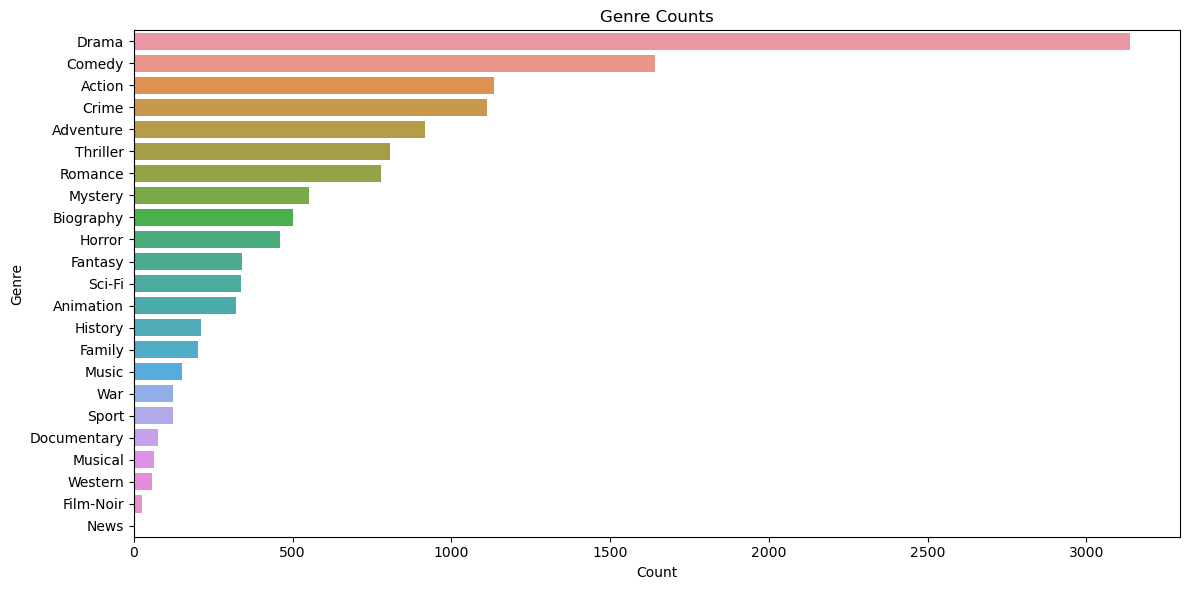

In [239]:
df_clean = df.dropna(subset=['genres'])

df_clean['genres'] = df_clean['genres'].str.split(',')

df_exploded = df_clean.explode('genres')

df_exploded['genres'] = df_exploded['genres'].str.strip()

genre_counts = df_exploded['genres'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='genre', data=genre_counts)
plt.title('Genre Counts')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


In [240]:
genre_avg_df

,genres,avgRating
16,News,8.000000
10,Film-Noir,7.796296
6,Documentary,7.772727
21,War,7.542276
22,Western,7.474138
11,History,7.316038
14,Musical,7.301538
3,Biography,7.297400
2,Animation,7.240994
7,Drama,7.228585


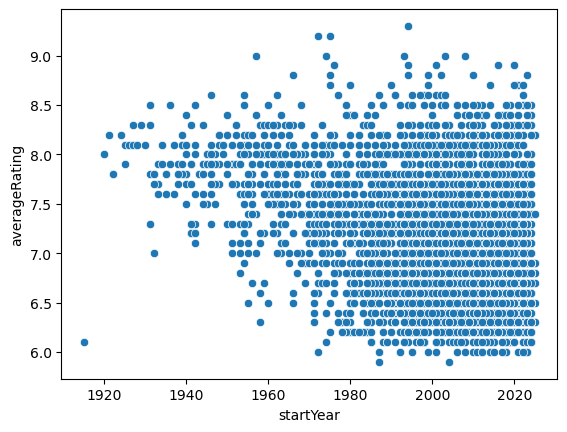

In [241]:
sns.scatterplot(x='startYear', y='averageRating', data=df)
plt.show()


In [242]:
print(df['averageRating'].mean())

7.1385
